# Decoding Board from Data

In [138]:
#necessary imports
import pandas
import numpy as np
import os
import tensorflow.keras as keras
from keras.models import Model
from keras.layers import Dense, Input
from IPython.display import display
import sympy as sp
sp.init_printing(use_latex = True)
import math

import matplotlib.pyplot as plt
%matplotlib inline

%run exp_Drivers.ipynb

EMPTY = 1;
COLOR = 0;

BLACK = -1;
WHITE = 1;

WIDTH = 9;

# Data Categorization and Assignment

In [43]:
Boards = []
Moves = []
def Main():
    path = "./go9"
    counter = 0
    for entry in os.scandir(path): #I changed my mind i love python
        Go = True
        Board = createEmptyBoard() # 0 - 80 = [color, empty], 81 = [turn, turn]
        with open(entry) as f:
            if Go:
                for line in f:
                    if line[0] == ';': # this is the line with all the moves.
                        Go = False
                        copy = ""
                        for c in line:
                            if c != "[" and c != "]" and c != ")":
                                copy += c
                        arr = copy[1:].split(';')
                        for a in arr:
                            int_move = Decode_Move(a[1:])
                            move = index_to_coordinate(int_move)
                            color = 1
                            if(a[0] == 'B'):
                                color = -1
                            Boards.append(Board)
                            Moves.append(int_move)
                            if int_move < 81:
                                Board = Move(Board, move[1], move[0])[1]
Main()
Boards = np.array(Boards)
print(Moves[0])
Moves = np.array(Moves)

40


In [44]:
print(Boards.shape)

(414124, 9, 9, 2)


In [76]:
# Example Position:
printBoard(Boards[22], -1)
printBoard(Boards[23], 1)

#  A B C D E F G H I
1  . . . . . . . . .
2  . . . . . . . . .
3  . . O . @ . @ . .
4  . . . O @ @ O @ .
5  . . @ O @ O O @ .
6  . . O . @ O . . .
7  . . . . @ O . . .
8  . . . @ O O . . .
9  . . . . . . . . .

#  A B C D E F G H I
1  . . . . . . . . .
2  . . . . . . . . .
3  . . O . @ . @ . .
4  . . . O @ @ O @ .
5  . . @ O @ O O @ .
6  . . O @ @ O . . .
7  . . . . @ O . . .
8  . . . @ O O . . .
9  . . . . . . . . .



In [46]:
X = Boards
Y = keras.utils.to_categorical(Moves)

training_samples = int(0.9 * X.shape[0])
X_train, X_test = X[:training_samples], X[training_samples:] # Inputs
Y_train, Y_test = Y[:training_samples], Y[training_samples:] # Outputs

print(X.shape)
print(Y.shape)
print(Moves)

(414124, 9, 9, 2)
(414124, 82)
[40 49 41 ... 75 18 36]


# Building the Model

In [117]:

model = keras.models.Sequential()

model.add(keras.layers.Dense(2, activation = 'relu', input_shape = (9, 9, 2)))
model.add(keras.layers.Conv2D(81, (3, 3), activation = 'relu'))
model.add(keras.layers.Conv2D(81, (3, 3), activation = 'relu'))
model.add(keras.layers.Conv2D(81, (3, 3), activation = 'relu'))
model.add(keras.layers.Conv2D(81, (3, 3), activation = 'relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(82, activation = 'relu'))
model.add(keras.layers.Dropout(.25))
model.add(keras.layers.Dense(82, activation = 'softmax'))


model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer = keras.optimizers.Adam(), metrics = [keras.metrics.CategoricalAccuracy()])
print(X_train.shape)

model.summary()

(372711, 9, 9, 2)
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 9, 9, 2)           6         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 7, 7, 81)          1539      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 5, 5, 81)          59130     
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 3, 3, 81)          59130     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 1, 1, 81)          59130     
_________________________________________________________________
flatten_12 (Flatten)         (None, 81)                0         
_________________________________________________________________
dense_44 (Dense)             (None,

# Training

In [140]:
# Load Weights
model.load_weights('mini_weights.h5')

In [141]:
#Train the model
history = model.fit(X_train, Y_train, batch_size = 2048, epochs = 1, workers = 10, verbose = 1, validation_data = (X_test, Y_test))

182/182 [==============================] - 42s 232ms/step - loss: 2.4011 - categorical_accuracy: 0.3733 - val_loss: 3.2180 - val_categorical_accuracy: 0.2856


In [142]:
# Save Weights
model.save_weights('mini_weights.h5')

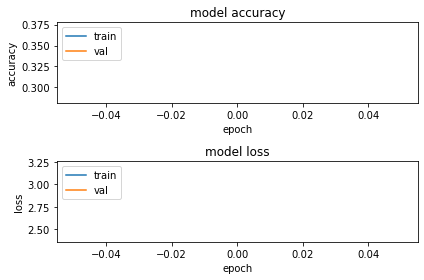

In [143]:
plt.figure(1)

plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

In [137]:
Play()

(9, 9, 2)
#  A B C D E F G H I
1  . . . . . . . . .
2  . . . . . . . . .
3  . . . . . . . . .
4  . . . . . . . . .
5  . . . . . . . . .
6  . . . . . . . . .
7  . . . . . . . . .
8  . . . . . . . . .
9  . . . . . . . . .

Black's Move: : 40
#  A B C D E F G H I
1  . . . . . . . . .
2  . . . . . . . . .
3  . . . . . . . . .
4  . . . . . . . . .
5  . . . . @ . . . .
6  . . . . . . . . .
7  . . . . . . . . .
8  . . . . . . . . .
9  . . . . . . . . .

White's Move: : 38
#  A B C D E F G H I
1  . . . . . . . . .
2  . . . . . . . . .
3  . . . . . . . . .
4  . . . . . . . . .
5  . . O . @ . . . .
6  . . . . . . . . .
7  . . . . . . . . .
8  . . . . . . . . .
9  . . . . . . . . .

Black's Move: : 21
#  A B C D E F G H I
1  . . . . . . . . .
2  . . . . . . . . .
3  . . . @ . . . . .
4  . . . . . . . . .
5  . . O . @ . . . .
6  . . . . . . . . .
7  . . . . . . . . .
8  . . . . . . . . .
9  . . . . . . . . .

White's Move: : 58
#  A B C D E F G H I
1  . . . . . . . . .
2  . . . . . . . . .
3  . . 